In [2]:
# 경고무시
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
# load library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

In [8]:
# load data
# 2021-01-01_2021-06-30
online_data = pd.read_csv("C:/nh/네이버_상품_고객프로파일_결혼상태.csv")
online_data.head()

,상품카테고리(대),상품카테고리(중),상품카테고리(소),상품카테고리(세),상품명,상품ID,결혼상태,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량,실결제금액,실결제상품수량
0,식품,농산물,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,기혼,"19,590,900",428,467,"797,100",19,19,18793800,448
1,식품,농산물,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,기혼,"13,785,200",204,218,"568,600",9,9,13216600,209
2,식품,농산물,쌀,백미,[농협양곡] 탑마루쌀 (신동진) 20kg,4939329513,기혼,"8,365,500",112,128,"195,500",3,3,8170000,125
3,식품,농산물,쌀,백미,[농협양곡] 한수위 파주쌀 (추청) 10kg,4945882031,기혼,"8,328,500",198,230,"108,000",3,3,8220500,227
4,식품,농산물,쌀,백미,[농협양곡] 한수위 파주쌀 10kg,4945882031,기혼,"7,520,300",180,211,"212,000",5,6,7308300,205


In [9]:
# 결측치 확인
online_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   상품카테고리(대)  173 non-null    object
 1   상품카테고리(중)  173 non-null    object
 2   상품카테고리(소)  173 non-null    object
 3   상품카테고리(세)  173 non-null    object
 4   상품명        173 non-null    object
 5   상품ID       173 non-null    int64 
 6   결혼상태       173 non-null    object
 7   결제금액       173 non-null    object
 8   결제수        173 non-null    int64 
 9   결제상품수량     173 non-null    int64 
 10  환불금액       173 non-null    object
 11  환불건수       173 non-null    int64 
 12  환불수량       173 non-null    int64 
 13  실결제금액      173 non-null    int64 
 14  실결제상품수량    173 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 20.4+ KB


In [10]:
# 통계량 파악
online_data['결혼상태'].describe()

count     173
unique      2
top        기혼
freq       95
Name: 결혼상태, dtype: object

In [11]:
# 가구당 결제상품수량 파악
grouped_name_s = online_data.groupby('결혼상태').sum()['실결제상품수량']
grouped_name_s

결혼상태
기혼    3569
미혼    1085
Name: 실결제상품수량, dtype: int64

In [12]:
# 가구당 결제금액 파악
grouped_name_m = online_data.groupby('결혼상태').sum()['실결제금액']
grouped_name_m

결혼상태
기혼    159580000
미혼     44496600
Name: 실결제금액, dtype: int64

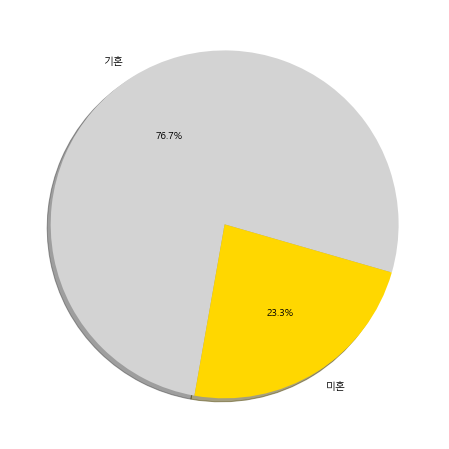

In [13]:
# 결혼상태 결제상품수량 파악
data = grouped_name_s
labels = ['기혼','미혼']
explode = (0.0, 0.0)
colors = ['lightgray', 'gold']

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

plt.pie(data, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

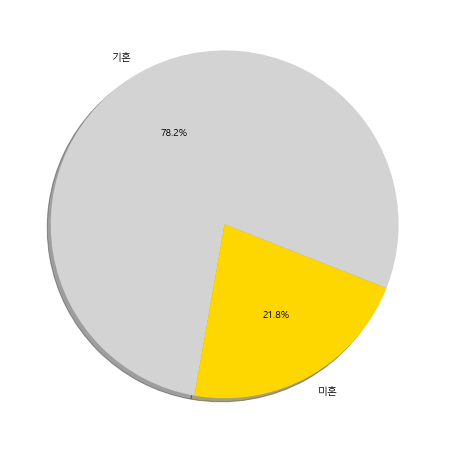

In [14]:
# 결혼상태 결제금액 파악
data = grouped_name_m
labels = ['기혼','미혼']
explode = (0.0, 0.0)
colors = ['lightgray', 'gold']

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

plt.pie(data, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()